In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import *
import scipy.integrate as integrate

## Functions to calculate the Fourier series 

Given a function $f$ in the interval $[l_i, l_f]$ we want to compute the Fourier coefficients of of the function. We will assume that $f$ is periodic with wavelength $(l_f-l_i)$. 

Code adapted by Rodrigo Araiza Bravo using code by Manas Sharma at https://www.bragitoff.com/2021/05/fourier-series-coefficients-and-visualization-python-program/#:~:text=The%20function%20returns%20the%20Fourier,cosine%20and%20sine%20terms%20respectively.

In [34]:
#This function returns the Fourier coefficients of a periodic function with [li, lf] as the period
def fourier(li, lf, K, f):
    l = (lf-li)/2
    # Constant term
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    # Cosine coefficents
    A = np.zeros((K))
    # Sine coefficents
    B = np.zeros((K))
     
    for k in range(1,K+1):
        A[k-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(k*np.pi*x/l), li, lf)[0]
        B[k-1]=1/l*integrate.quad(lambda x: f(x)*np.sin(k*np.pi*x/l), li, lf)[0]
 
    return [a0/2.0, A, B]

# This functions returns the value of the Fourier series for a given value of x given the already calculated Fourier coefficients
def fourierSeries(coeffs,x,l,K):
    value = coeffs[0]
    for k in range(1,K+1):
        value = value + coeffs[1][k-1]*np.cos(k*np.pi*x/l) +  coeffs[2][k-1]*np.sin(k*np.pi*x/l)
    return value

# Function that will convert any given function 'f' defined in a given range '[li,lf]' to a periodic function of period 'lf-li' 
def periodicf(li,lf,f,x):
    if x>=li and x<=lf :
        return f(x)
    elif x>lf:
        x_new=x-(lf-li)
        return periodicf(li,lf,f,x_new)
    elif x<(li):
        x_new=x+(lf-li)
        return periodicf(li,lf,f,x_new)


### List of functions we may want to approximate 

The function periodicf takes in a function and makes it periodic

In [35]:
def periodicf(li,lf,f,x):
    if x>=li and x<=lf :
        return f(x)
    elif x>lf:
        x_new=x-(lf-li)
        return periodicf(li,lf,f,x_new)
    elif x<(li):
        x_new=x+(lf-li)
        return periodicf(li,lf,f,x_new)

def ReLu(x):    
    if x<0: return 0
    else: return x

def ReLuP(x, li, lf): 
    return periodicf(li,lf,ReLu,x)

def sigmoid(x): 
    return 1/(1+np.exp(-1))

def sigmoidP(x, li, lf): 
    return periodicf(li, lf, sigmoid, x)

def tanh(x): 
    return np.tanh(x)

def tanhP(x, li, lf): 
    return periodicf(li, lf, tanh, x)

def step(x): 
    if x<0: return 0
    else: return 1
    
def stepP(x, li, lf): 
    return periodicf(li, lf, step, x)
    
def LeakyReLu(x, a=0.01): 
    if x<0: return a*x
    else: return x
    
def LeakyReLuP(x, li, lf): 
    return periodicf(li, lf, LeakyReLu, x)

def swish(x): 
    return x*sigmoid(x)

def swishP(x, li, lf): 
    return periodicf(li, lf, swish, x)

Ex) Learning relu in the range where it's less than 1.

In [38]:
K=10
li, lf= -np.pi, np.pi
coeffs = fourier(li,lf,K,ReLu)
print('Fourier coefficients for the ReLu wave\n')
print('a0 ='+str(coeffs[0]))
print('an ='+str(coeffs[1]))
print('bn ='+str(coeffs[2]))
print('-----------------------\n\n')

Fourier coefficients for the ReLu wave

a0 =0.7853981633974483
an =[-6.36619772e-01  2.49800181e-16 -7.07355303e-02  5.55111512e-17
 -2.54647909e-02  1.74488764e-16 -1.29922403e-02  3.46944695e-17
 -7.85950336e-03 -3.79899587e-16]
bn =[ 1.         -0.5         0.33333333 -0.25        0.2        -0.16666667
  0.14285714 -0.125       0.11111111 -0.1       ]
-----------------------




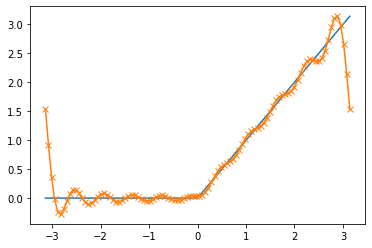

In [39]:
xs=np.linspace(li,lf,100)
l = (lf-li)/2.0

plt.figure()
plt.plot(xs, [ReLu(x) for x in xs], label='ReLu')
plt.plot(xs, [fourierSeries(coeffs,x,l,K) for x in xs], marker='x', label='Fourier series')